In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats as stats

import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-2])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.trading_systems as ts

C:\Users\Martin\Projects\OSRS_Research
['C:\\Users\\Martin\\Projects\\OSRS_Research\\ML\\OSRS', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\python37.zip', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\DLLs', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37', '', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martin\\.ipython', 'C:\\Users\\Martin\\Projects\\OSRS_Research']


In [2]:
with open(address+'/Data/itemPrices.pickle','rb') as f:
    itemPrices = pickle.load(f)
with open(address+'/Data/viableItems.pickle','rb') as f:
    viableItems = pickle.load(f)

In [3]:
persProfits = {}
for item in viableItems:
    try:
        prices = items.getPrices(item)[-120:]
        bl = int(items.getInfo(item)['buyLimit'])
        budget = bl*prices[0]+1
        persProfits[item] = ts.persistanceProfit(prices,bl,budget)[-1]
    except ValueError:
        print(item,items.getInfo(item)['buyLimit'])

In [4]:
sortedProfits = sorted(persProfits.items(), key=lambda kv: kv[1])

In [5]:
print(sortedProfits[-10:])
print(sortedProfits[:10])

[('Elemental_talisman', 2.982916423705169), ('Garden_pie', 3.0927864722116194), ('Wool', 3.137677285967593), ("Blue_d'hide_chaps_(g)", 3.1869404344241867), ('Avantoe_seed', 3.36093314007016), ("Mos_le'harmless_teleport", 3.580601504948985), ('Redberry_pie', 6.26603325415677), ('Coconut', 7.5028551999096464), ('Royal_crown', 8.8319035508312), ('Mind_talisman', 15.424885054599171)]
[('Prayer_potion(2)', -0.14685212747809032), ("Karil's_coif", -0.13506338794003184), ('Stone_scarab', -0.08779468345497161), ('Rune_plateskirt_(g)', -0.0805203926889616), ('Dragon_dagger(p+)', -0.0761842484901741), ('Frozen_whip_mix', -0.07217618794053825), ('Dragon_spear', -0.06545918068902852), ('Staff_of_water', -0.06010341421376336), ("Ahrim's_staff", -0.04320069009004264), ('Steel_battleaxe', -0.04245716034271726)]


In [6]:
print(len(sortedProfits))
vItems = []
for item in sortedProfits:
    if item[1]<10 and item[1]!=0:
        vItems.append(item[0])
print(len(vItems))

1093
1070


In [7]:
with open(address+'/Data/targetItems.pickle','wb') as f:
    pickle.dump(vItems,f)

In [8]:
perfProfits = {}
for item in viableItems:
    try:
        prices = items.getPrices(item)[-120:]
        bl = int(items.getInfo(item)['buyLimit'])
        budget = bl*prices[0]+1
        perfProfits[item] = abs(ts.perfectProfit(prices,bl,budget)[-1]-persProfits[item])/abs(persProfits[item])
    except:
        print(item)

Anti-venom+(3)
New_crystal_shield
Antifire_potion(2)
Super_str._mix(2)
Paddewwa_teleport
Cooked_slimy_eel
3rd_age_cloak
Toy_soldier
Zamorak_brew(4)
Raw_jubbly
White_flowers
Blue_elegant_skirt
Green_dark_bow_paint
Cheese+tom_batta
Axeman's_folly
Torstol_potion_(unf)
Odium_shard_1
Combat_potion_set
Godsword_blade
Agility_mix(2)
Dragon_arrow(p)
Wood_camo_legs


In [9]:
sortedProfits = sorted(perfProfits.items(), key=lambda kv: kv[1])

In [10]:
print(sortedProfits[-100:])
print(sortedProfits[:10])

[('Purple_boots', 15.55243639094921), ('Giant_frog_legs', 16.330166666666667), ('3rd_age_vambraces', 16.409357442862596), ('Steam_staff_upgrade_kit', 16.79532144786602), ('Adamant_trimmed_set_(sk)', 16.86905845140604), ('Prayer_potion(1)', 16.899843907140465), ('Raw_dark_crab', 16.963681742381), ('Afro', 17.050338091660404), ('Black_beret', 17.19089591886018), ('Bronze_plateskirt_(t)', 17.259365994236312), ('Initiate_harness_m', 17.460125301833845), ('Steel_battleaxe', 17.46743886743887), ('Helm_of_neitiznot', 17.586164546803182), ('Shaikahan_bones', 17.73360135421075), ('Draconic_visage', 18.220837840051757), ("Guthan's_chainskirt_0", 18.999721415026965), ("Druid's_robe_top", 19.111478572412842), ('Steel_dragon_mask', 19.27925684734725), ('Mithril_mace', 19.2827868852459), ('Wood_camo_top', 19.643333333333334), ('Monocle', 19.718614718614717), ('Blue_headband', 19.818407960199004), ('Rune_armour_set_(sk)', 20.00754109472971), ('Half_full_wine_jug', 20.026975759313586), ('Sanfew_serum(

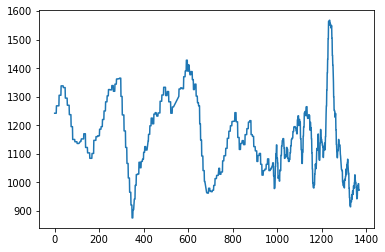

In [11]:
plt.plot(items.getPrices('Purple_hat'))
plt.show()

In [12]:
priceVar = {}
for item in vItems:
    prices = items.getPrices(item)
    priceVar[item] = stats.variation(prices[-120:])

In [13]:
sortedVar = sorted(priceVar.items(), key=lambda kv: kv[1])

In [14]:
print(sortedVar[-10:])
print(sortedVar[:10])

[('Coconut', 0.6113702397235251), ('Adamant_platelegs_(g)', 0.613785172048646), ('Green_partyhat', 0.6193378419535801), ('Yellow_partyhat', 0.6225338340824274), ('Partyhat_set', 0.6326411763589912), ('White_partyhat', 0.6340292882480252), ('Santa_hat', 0.6365390269089448), ('Purple_partyhat', 0.6444675588736032), ('Red_partyhat', 0.6949474177708435), ('Royal_crown', 0.7108820848194402)]
[('Runite_bar', 0.003693147327273252), ('Dwarf_cannon_set', 0.004396631864693622), ('Rune_armour_set_(lg)', 0.004707062769422007), ('Dragon_2h_sword', 0.005904288644152934), ('Cannon_furnace', 0.006371861316681649), ('Cannon_base', 0.006528572209141479), ('Cannon_barrels', 0.00664822617721253), ('Soul_rune', 0.006719511310929261), ('Dragon_sq_shield', 0.0069888094866006846), ('Gold_leaf', 0.007123827874557515)]


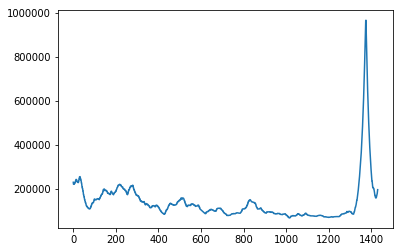

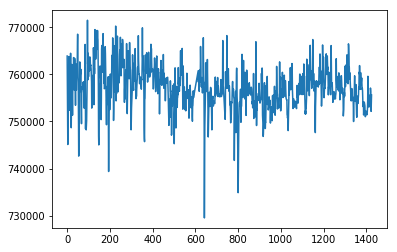

In [15]:
plt.plot(items.getPrices(sortedVar[-1][0]))
plt.show()
plt.plot(items.getPrices(sortedVar[1][0]))
plt.show()